In [24]:
import pandas as pd
from collections import Counter
df=pd.read_csv("iris.csv")
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
df.shape

(150, 5)

In [4]:
df.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name'], dtype='object')

In [5]:
df.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.isnull()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


<function matplotlib.pyplot.show(*args, **kw)>

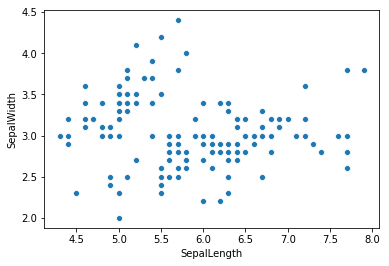

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt  
sns.scatterplot(df['SepalLength'] ,df['SepalWidth'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

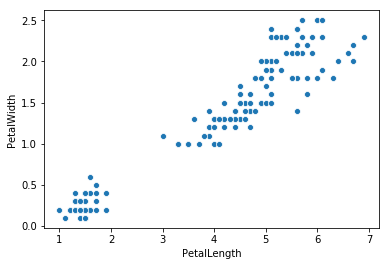

In [9]:
sns.scatterplot(df['PetalLength'] ,df['PetalWidth'])
plt.show

In [10]:
# splitting into training and validation sets
import numpy as np
from sklearn.model_selection import train_test_split
X = np.array(df.iloc[:, 0:4])
y = np.array(df['Name']) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print(accuracy_score(y_test,pred))

0.98


In [65]:
from sklearn.model_selection import cross_val_score
myList = list(range(1,50))
neighbors =list( filter(lambda x: x % 2 != 0, myList))
cv_scores = []
cv_newscores=[]
one=list()
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    newscores=cross_val_score(knn,X_train,y_train,cv=10,scoring='accuracy')
    cv_newscores.append(newscores.mean())
    one.append('1')

In [73]:
newList=list()
for x in neighbors:
    newList.append(1/x)

The optimal number of neighbors is 7


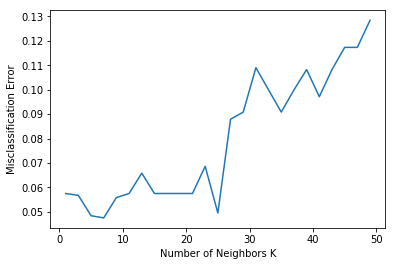

In [71]:
import  matplotlib.pyplot as plt
import seaborn as sns
MSE=[1-x for x in cv_scores]
MSE1=[1-x for x in cv_newscores]
optimal_k=neighbors[MSE.index(min(MSE))]
print ("The optimal number of neighbors is", optimal_k)
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()



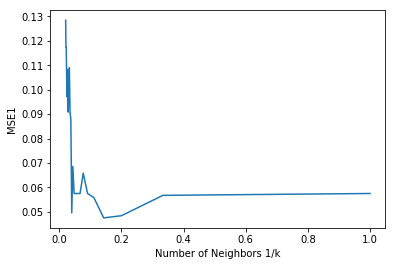

In [77]:
plt.plot(newList,MSE1)
plt.xlabel('Number of Neighbors 1/k')
plt.ylabel('MSE1')
plt.show()

In [47]:
# implementing knn function
def train(X_train, y_train):
    return

In [19]:

def predict(X_train, y_train, x_test, k):
    distances = []
    targets = []
    for i in range(len(X_train)):
        distance = np.sqrt(np.sum(np.square(x_test - X_train[i, :])))
        distances.append([distance, i])
    distances = sorted(distances)
    for i in range(k):
        index = distances[i][1]
        targets.append(y_train[index])
    return Counter(targets).most_common(1)[0][0]



In [25]:
def kNearestNeighbor(X_train, y_train, X_test, predictions, k):
    train(X_train, y_train)
    for i in range(len(X_test)):
        predictions.append(predict(X_train, y_train, X_test[i, :], k))
        
predictions = []
kNearestNeighbor(X_train, y_train, X_test, predictions, 7)
predictions = np.asarray(predictions)
accuracy = accuracy_score(y_test, predictions)
print(accuracy_score(y_test,pred))

0.98
